<a href="https://www.kaggle.com/code/sergioadauto/telegram-pipeline?scriptVersionId=116203926" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1>Pipeline de dados do Telegram na AWS</h1>

<h2>1. Contexto</h2>
<p style="text-align:justify">Esse projeto faz parte do material avaliativo do curso de profissão analista de dados da <a href="https://ebaconline.com.br/analista-de-dados">EBAC</a>. A sua estruturação se divide em 2 partes, sendo a primeira responsável pelo sistema transacional, ou seja, o grupo responsável pelos elementos do Telegram (chatbot e suas configurações). Já a segunda parte é encarregada pelo sistema analítico, na qual, envolve a ingestão dos dados, o método ETL, a apresentação dos dados (via AWS Athena), e por fim, o método extra responsável pela atualização dos dados de apresentação.</p>
<p style="text-align:justify">Para realizar a implementação desse pipeline, foi utilizado a ingestão em ETL utilizando Python e as ferramentas da AWS. Dessa forma, foi garantido que no final do processo teremos um banco de dados populado de forma automática, onde é possível extrair métricas e insights.</p>

<h2>2. Arquitetura</h2>

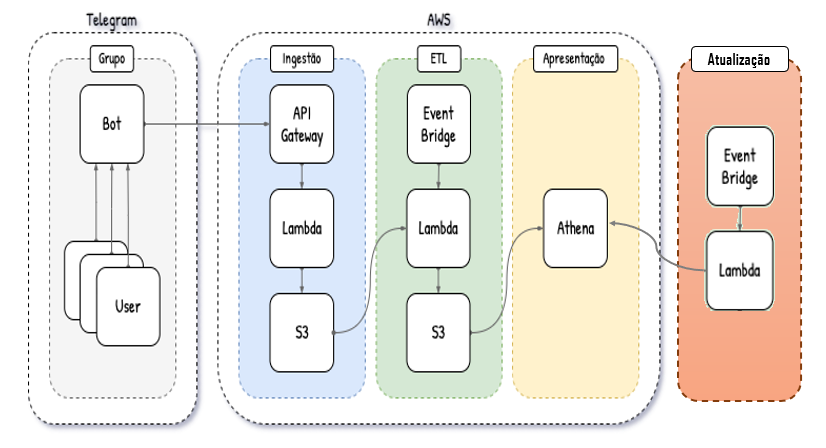

<h3>2.1 Sistema Transacional</h3>
<p style="text-align:justify">O meio transacional é responsável pela confecção dos dados brutos a serem coletados. Além disso, o sistema transacional não dispõe de meio que possibilitem a análise desses dados, pois sua atribuição é encarregada pela formação continua dos dados. Para esse exemplo, a sua representação é dada pelo sistema do Telegram, com suas ferramentas e o chatbot; A implementação do chatbot no grupo de conversas do Telegram foi responsável pela captura das mensagens, e o seu conteúdo fica disponível nos servidores do Telegram durante 24h no formato de documentação JSON.</p>

<h3>2.2 Sistema Analítico</h3>
<p style="text-align:justify">A camada analítica é responsável pela ingestão, processamento e apresentação das informações obtidas através da camada transacional. Na etapa da ingestão, os dados transacionais são persistidos no formato mais próximo do original, sem transformação, ou processamento do seu conteúdo. Além disso, a ingestão dos dados pode ocorrer na forma de <em>Batch</em>, contendo um intervalo de tempo definido (como horas, dias, semanas, e meses), ou ocorrer em formato de <em>Streaming</em>, onde a ingestão dos dados é realizada muito próxima ao tempo real.</p>
<h3>2.2.1 Ingestão</h3>
<p style="text-align:justify">Para o caso desse projeto, a ingestão dos dados é realizada via streaming, pois as mensagens são capturadas de forma contínua pelo chatbot, e ficam disponíveis por tempo limitado nos servidores do Telegram. Por esse motivo, foi optado a utilização do serviço da AWS API Gateway, com a configuração de uma webhook para redirecionar as informações da API do Telegram e salvar em um bucket do S3.</p>
<ul><li>Para mais detalhes do processo de ingestão <a href="https://github.com/SergioAdauto/da-ebac/blob/main/modulos_finais/ingestao.ipynb">click aqui</a>!</ul>
<h3>2.2.2 ETL</h3>
<p style="text-align:justify">Já o processo de ETL (extração, transformação e carregamento), é responsável pela manipulação dos dados armazenados no dia anterior (D-1). Esse dados são extraidos do S3 Bucket através de uma função do AWS Lambda, onde serão compactas em um único arquivo, orientado a coluna e comprimido para o formato parquet, que garante o menor consumo de armazenamento e também permite a criação de uma camada de enriquecimento. Além disso, durante este processo, os dados também passaram por etapas de data wrangling para que possa garantir a extração de insights na camada de apresentação.</p>
<p style="text-align:justify">Como forma de garantir que esse processo de extração, transformação e carregamento seja realizado de forma contínua e automatizada, foi utilizado a ferramenta AWS Event Bridge, na qual, cria um fluxo de trabalho que executa a função Lambda diariamente, fazendo com que ela processe as mensagens do dia anterior que estão armazenadas de forma bruna no S3 Bucket.</p>
<ul><li>Se tiver interesse de descobrir o passo a passo do processo de ETL, <a href="https://github.com/SergioAdauto/da-ebac/blob/main/modulos_finais/ETL.ipynb">clique aqui</a>!</ul>